In [13]:
import numpy as np
from matplotlib import pylab as plt
import scipy as sp
from scipy import signal as sgn
import scipy.signal.signaltools as sigtool
from scipy.signal import hilbert, chirp
%matplotlib inline
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
from IPython.display import Image

In [2]:
Fp = 1000000    # Frecuencia de portadora
Fm1 = 1000      # Frecuencia modulante 1
Fm2 = 1500      # Frecuencia modulante 2
Mult = 80 #a cuantas Fp muestreo
Fs = Mult*Fp #Frecuencia de muestreo
tiempo = 0.006
t = np.linspace(0,tiempo,tiempo*Fs)
t.shape
f = np.linspace(0,Fs,t.shape[0])

In [3]:
Vs = 10
m = 0.25
vs = Vs*(1+m*(np.cos(2*np.pi*Fm1*t)+np.cos(2*np.pi*Fm2*t)))*np.cos(2*np.pi*Fp*t)

In [4]:
Qc = 10.
Vdsmin = 10.
Vdd = 100.
Vcc = 0.
Ids = 2./3 * vs
Ids = np.array([i if i>0 else 0 for i in Ids])

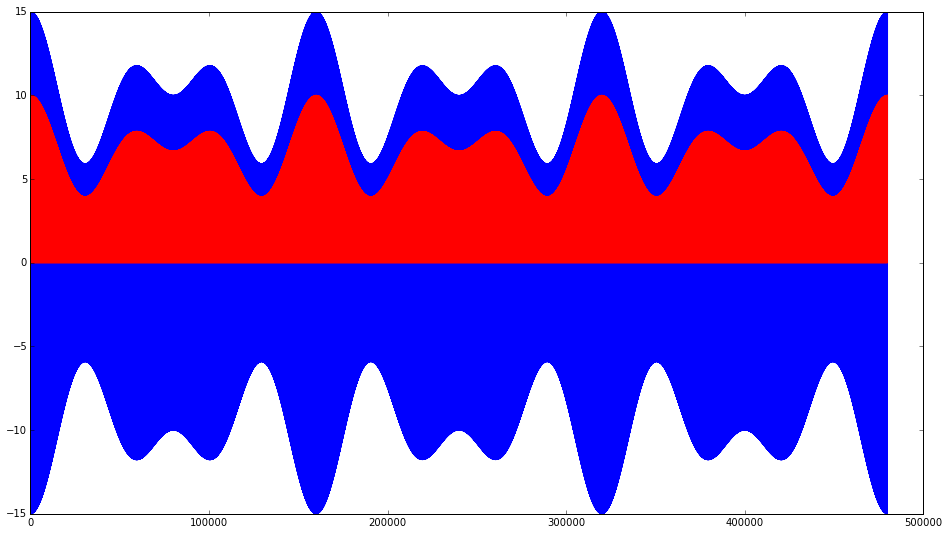

In [5]:
plt.plot(vs,'b')
plt.plot(Ids,'r')

# Archivo de salida para usar en una fuente de corriente de LTSpice

In [6]:
file = open("salida.txt",'w')
#fileq = open("salidaq.dat",'w')
for j,i in enumerate(Ids):
    file.write(str(np.float(j)/Fs)+ " "+str(i)+"\n")
 #   fileq.write(str(j/Fs)+ " ; "+str(i)+"\n")
    #print(str(j/Fs)+ " "+str(i))
file.close()
#fileq.close()

### Cálculo de los componentes del tanque

In [7]:
Id2 = 20./3./np.pi

In [8]:
Rc = (Vdd-Vdsmin)/Id2
Rc

42.4115008234622

In [9]:
L = Rc/(2*np.pi*2*Fp*Qc)
L

3.3749999999999995e-07

In [10]:
C = Qc/(Rc*2*np.pi*Fp*2)
C

1.8763182155988485e-08

In [11]:
(Ids.cumsum()/Ids.shape)[-1]

2.1220789942936262

# Circuito de LTSpice:
La fuente de corriente usa los puntos obtenidos en Ids

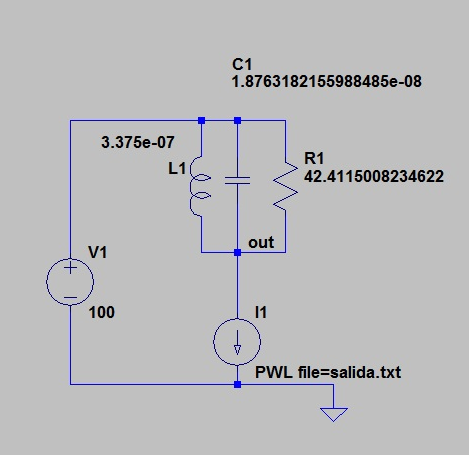

In [14]:
Image(filename=u'circuito.png')

## Grafico de la salida del LTSpice
Una vez generado el circuito en LTSpice, analizo la señal de tensión sobre la R

In [15]:
import pandas as pd

In [16]:
output =  pd.read_csv("DobladorFrecuenciaVRc.txt",sep='\t')

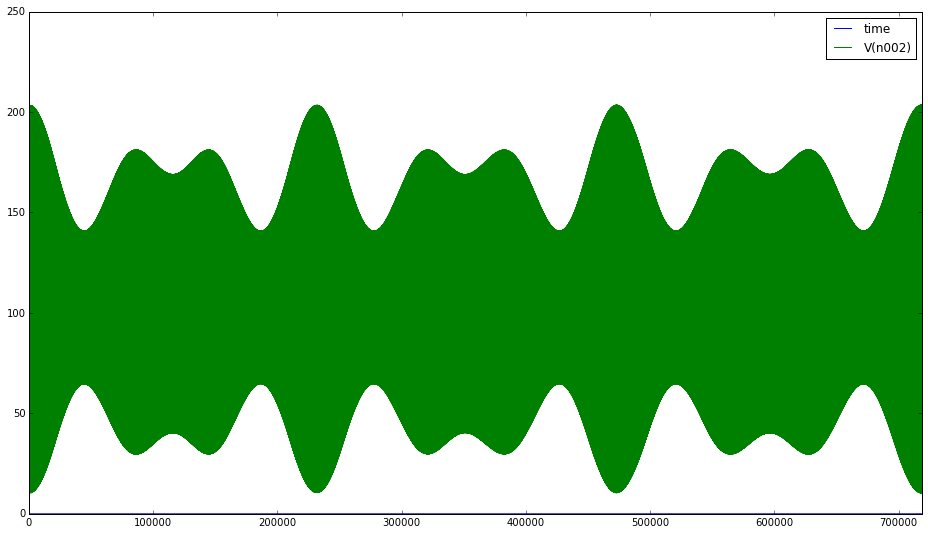

In [17]:
output.plot()

### Señal en Rc

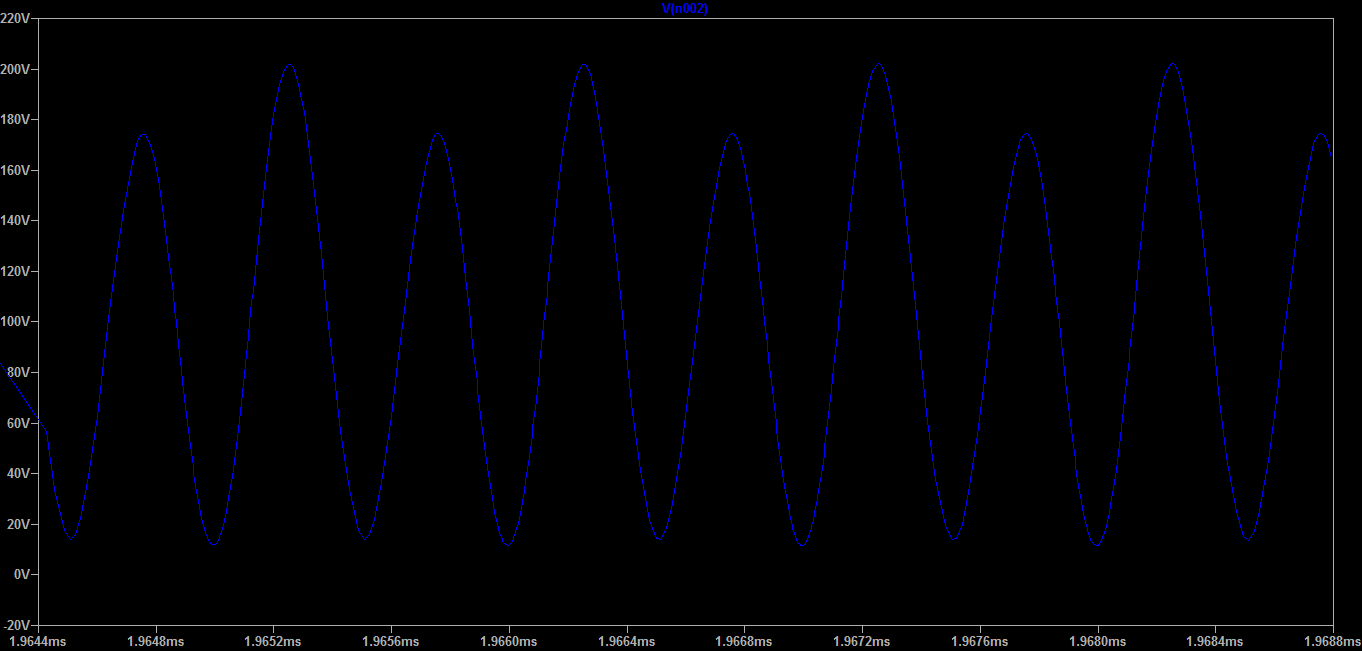

In [18]:
from IPython.display import Image
Image(filename=u'SeñalEnRc.png')

### Señal Completa:

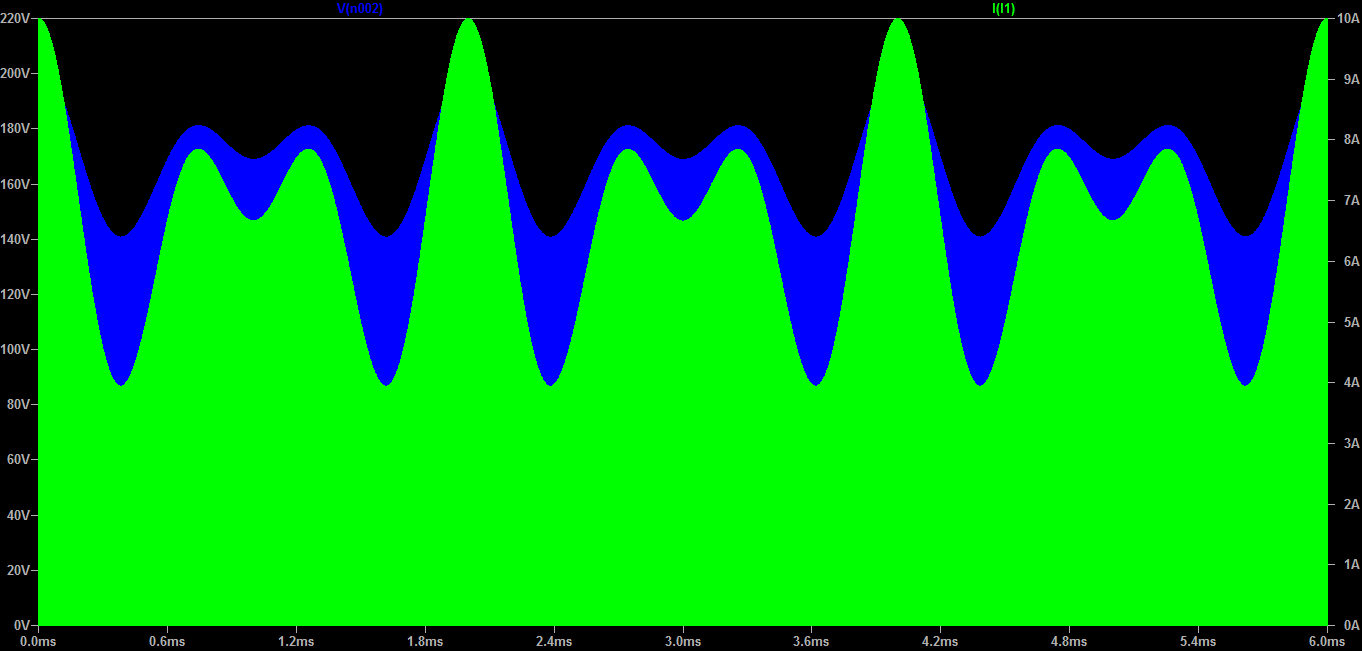

In [19]:
Image(filename=u'SeñalEnRcYIgen.png')

# Espectro de la señal en Rc (1Mhz): 

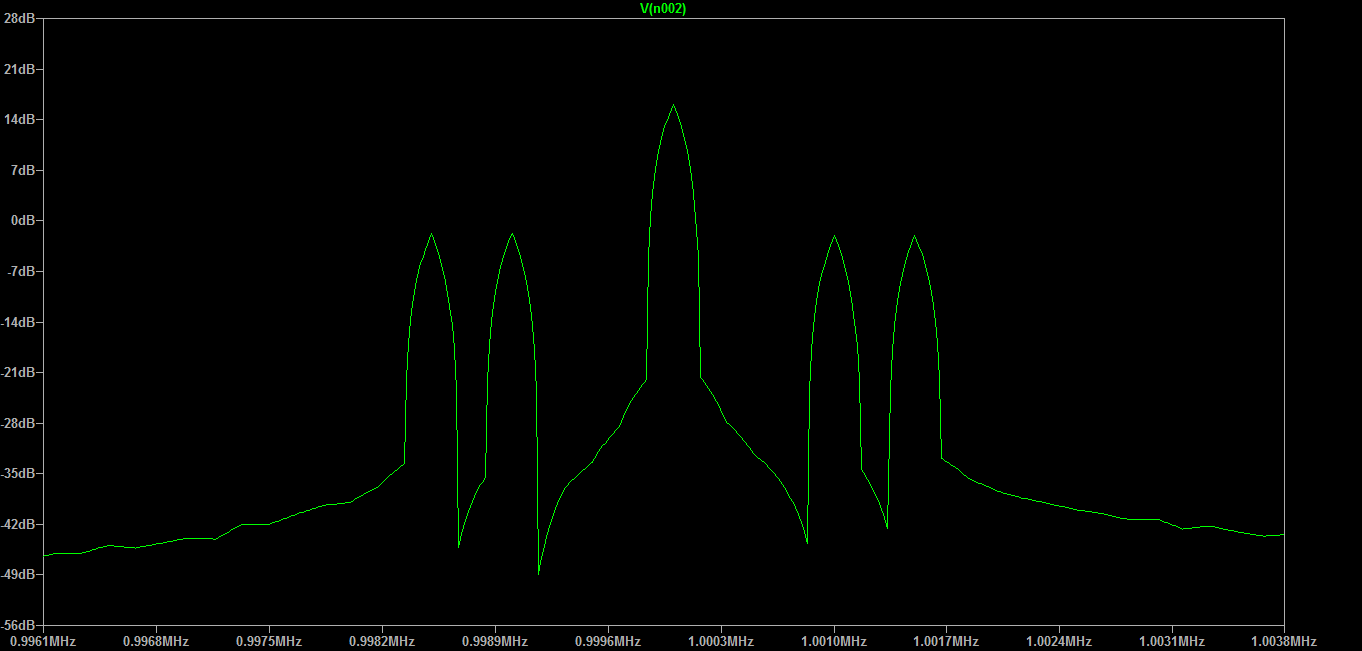

In [20]:
Image(filename=u'espectroEnUnMega.png')

# Espectro de la señal en Rc (2Mhz): 

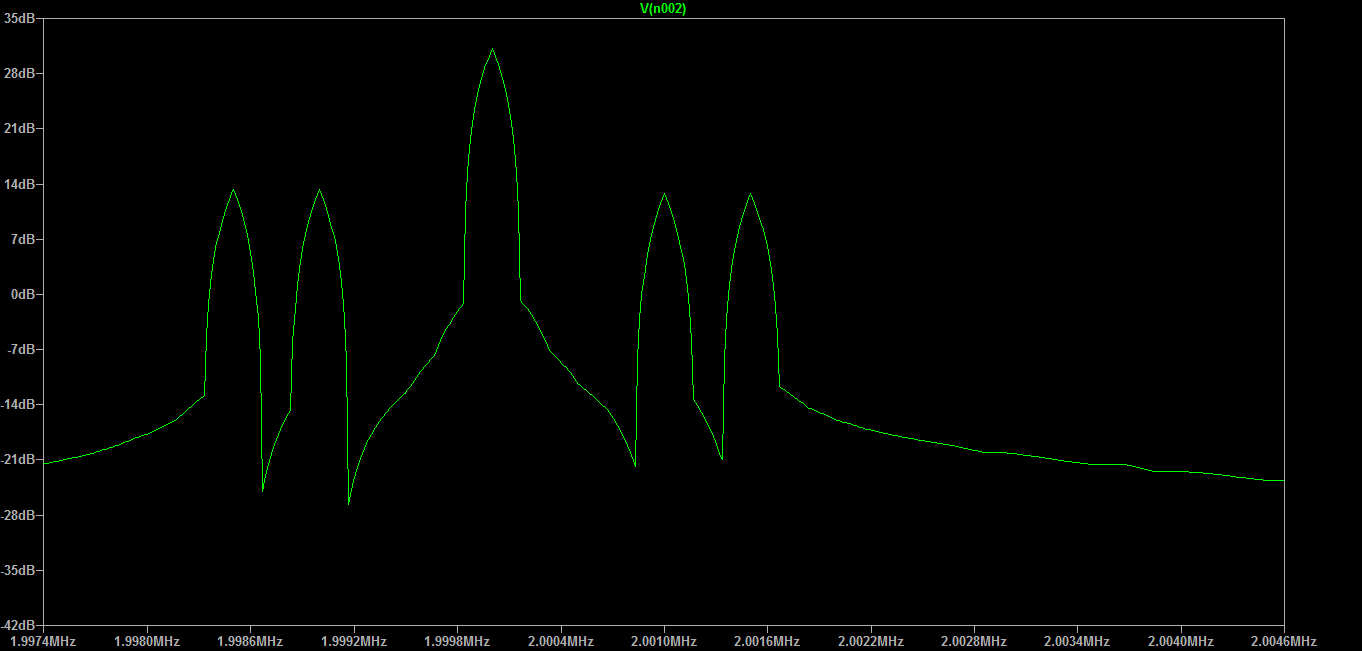

In [21]:
Image(filename=u'espectroEnDosMegas.png')

# Espectro de la señal en Rc (3Mhz): 

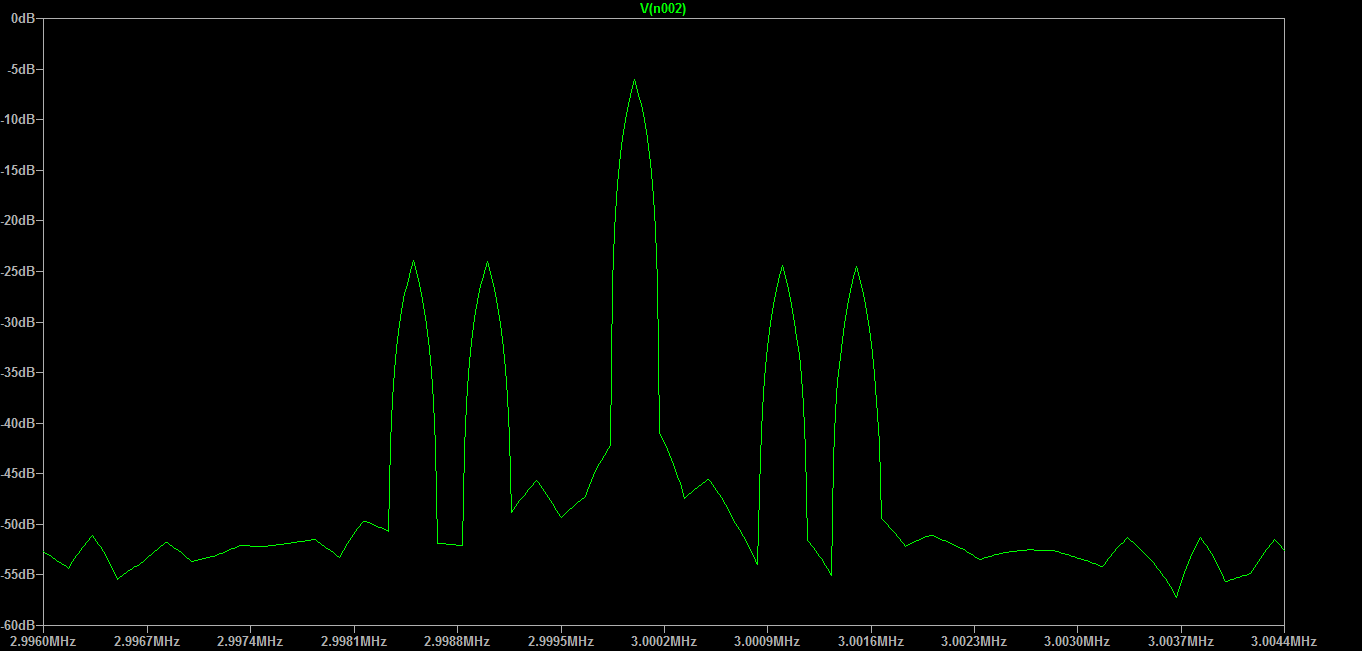

In [22]:
Image(filename=u'espectroEnTresMegas.png')

# Agregado un detector de envolvente (con diodo ideal)

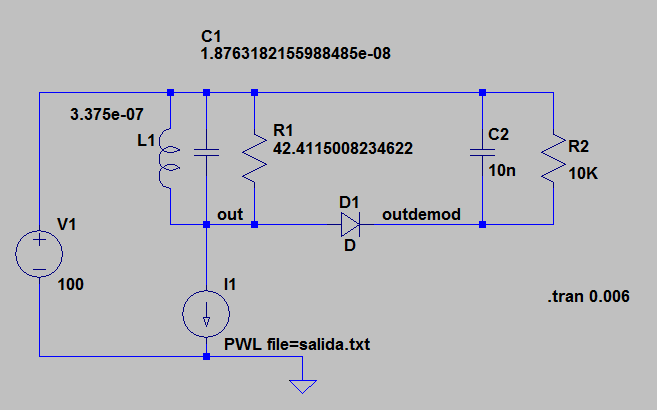

In [23]:
Image(filename=u'circuitoConDemod.png')

Se observa la misma señal con los tonos de 1K y 1.5K

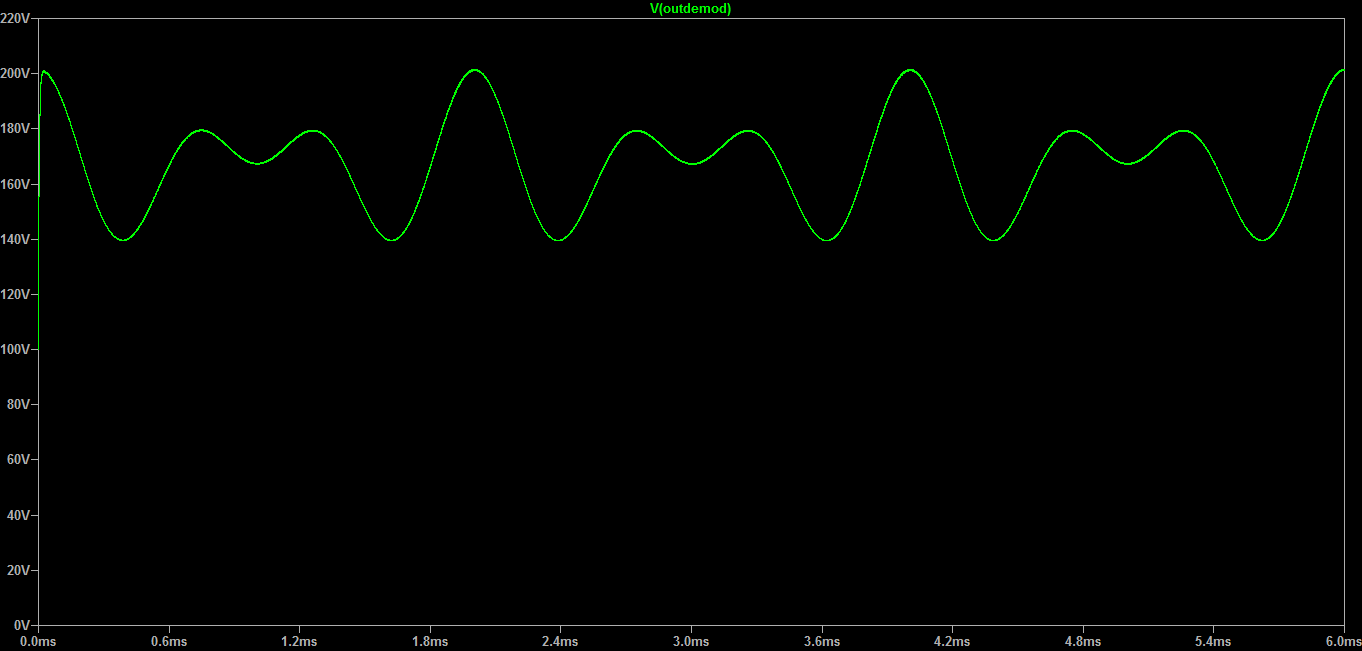

In [24]:
Image(filename=u'salidaDemodulada.png')

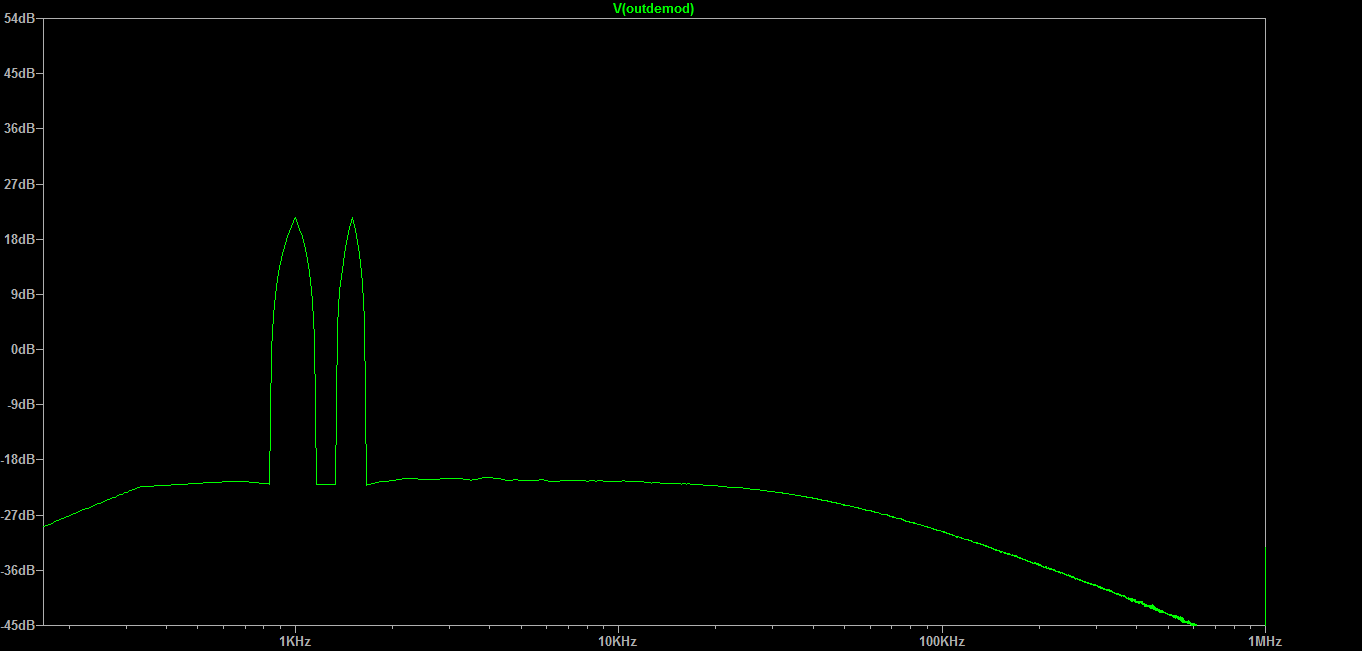

In [25]:
Image(filename=u'EspectroDemodulado.png')